# FlatIron Capstone Project

## Research Domain: Hilton Hotel Chain in the United Kingdom
## Research Question: What are the Most Positive/Negative Customer Sentiments?

# I. Index

#### Process
The standard OSEMN framework will be used for the analysis:

    - Obtain: The data was taken from an open-source dataset on Kaggle which was populated from the travel site booking.com. It contained 515k reviews from various luxury hotel chains across Europe. I decided to focus on the Hilton chain in the United Kingdom for this analysis.
    
    - Scrub: The information being analyzed in this document is of review data of type text, so stripping whitespace and filler values will be the predominant scrubbing task.
    
    - Exploring: In this step we will be looking at how the Hotel's customer base is distributed by place of origin. This will inform which customer segment we will focus on in our modelling step.
    
    - Modeling: Linear Regression will be used to perform a sentiment analysis and output the most positive and negative words used by customers to describe their experience.
    
    -Interpreting: We will be looking at the words immediatley before and after those outputted in the modelling step. This is based on the underlying assumption of distributional semantics i.e. words that are used and occur in the same contexts tend to purport similar meanings

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from hdx.location.country import Country
import pandas as pd
from gensim.models import Word2Vec
from nltk import word_tokenize
import re

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# 1.0 Obtaining

In [2]:
raw_df = pd.read_csv('Hotel_Reviews.csv')
raw_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
5,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
8,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/9/2017,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25 days,52.360576,4.915968
9,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/8/2017,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26 days,52.360576,4.915968


In [3]:
raw_df['Hotel_Address'].nunique()

1493

As evidenced by the total rows and addresses in the dataframe, the raw dataset is too large to perform a meaningful analysis on with the given time frame of this project.

As a result, the dataset was narrowed to the target market of the United Kingdom (rationale for market choice detailed in blog post linked above).

In [4]:
df = raw_df[raw_df['Hotel_Address'].str.contains("United Kingdom")]
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
405,1 15 Templeton Place Earl s Court Kensington a...,244,8/3/2017,8.5,K K Hotel George,Ireland,Really nothing negative to say about this hotel,9,1831,Very comfortable beds smart bathroom good sho...,18,2,9.6,"[' Leisure trip ', ' Group ', ' Classic Twin R...",0 days,51.491888,-0.194971
406,1 15 Templeton Place Earl s Court Kensington a...,244,8/2/2017,8.5,K K Hotel George,United States of America,No coffee or tea in the room or lobby No one ...,52,1831,No Positive,0,1,7.1,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",1 days,51.491888,-0.194971
407,1 15 Templeton Place Earl s Court Kensington a...,244,7/20/2017,8.5,K K Hotel George,United States of America,Room was pretty small for the three of us,11,1831,The staff was very friendly and helpful in or...,27,3,9.2,"[' Leisure trip ', ' Family with young childre...",14 days,51.491888,-0.194971
408,1 15 Templeton Place Earl s Court Kensington a...,244,7/19/2017,8.5,K K Hotel George,Australia,Nothing really,4,1831,We stayed at the hotel at a friend s recommen...,66,15,9.6,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",15 days,51.491888,-0.194971
409,1 15 Templeton Place Earl s Court Kensington a...,244,7/18/2017,8.5,K K Hotel George,United States of America,Only cab service to airport is expensive comp...,16,1831,Super location on Division underground line d...,60,1,8.3,"[' Leisure trip ', ' Group ', ' Classic Twin R...",16 days,51.491888,-0.194971
410,1 15 Templeton Place Earl s Court Kensington a...,244,7/10/2017,8.5,K K Hotel George,United States of America,London hotel rooms are very small There was v...,24,1831,Breakfast buffet was more than satisfactory P...,68,2,9.2,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",24 days,51.491888,-0.194971
411,1 15 Templeton Place Earl s Court Kensington a...,244,7/6/2017,8.5,K K Hotel George,Australia,The room for three people was on the small side,12,1831,There was a beautiful garden at the back of t...,38,4,9.6,"[' Leisure trip ', ' Group ', ' Classic Triple...",28 days,51.491888,-0.194971
412,1 15 Templeton Place Earl s Court Kensington a...,244,6/30/2017,8.5,K K Hotel George,United Kingdom,Room wasn t ready on arrival after travelling...,94,1831,Fantastic location very clean room someone ca...,23,3,5.8,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",34 days,51.491888,-0.194971
413,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,Our room allocated wasn t up to our expectati...,40,1831,Breakfast was excellent Staff in the restaura...,25,3,6.7,"[' Leisure trip ', ' Group ', ' Classic Triple...",37 days,51.491888,-0.194971
414,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,The cooked elements of breakfast could have b...,18,1831,The garden was a bonus Lovely area to have so...,25,12,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",37 days,51.491888,-0.194971


# 2.0 Scrubbing

### 2.1 Numerical Columns

In [5]:
df.isna().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

No NaN values to deal with.

### 2.2 Text Columns

#### Remove whitespace

There is significant whitespace in the review columns which will be dealt with by simply applying the strip method to them. 

In [6]:
def strip_string(input_str):
    """
    'strips whitespace of a string.'
    
    Args:
        input_str: string to be stripped

    Returns:
        input_str arg stripped of whitespace

    """


    return input_str.strip()
#strip_string(test_str1)

In [7]:
df['Negative_Review_stripped'] = df['Negative_Review'].apply(strip_string)
df['Positive_Review_stripped'] = df['Positive_Review'].apply(strip_string)

#### Remove Filler Values

The first step in this process will be to get a view on the filler values, simply by using the .value_counts() method to view the unique text values in the columns

In [8]:
df.Negative_Review_stripped.value_counts()

No Negative                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  60219
Nothing                                                                                                                                                                                                                                              

In [9]:
df.Positive_Review.value_counts()

No Positive                                                                                                                                                                                                                                                                                 19632
 Location                                                                                                                                                                                                                                                                                    5328
 Everything                                                                                                                                                                                                                                                                                  1239
 location                                                                                                                         

Using these views, we can now generate a list of filler values to be removed.

In [10]:
neg_values_to_remove = ['No Negative','Nothing','N A','nothing','None',
                        'N a','n a','none','Nothing at all', 'Nothing really', 'Nothing to dislike',
                        'No complaints','Nil', 'NA', 'All good','Can t think of anything','Na','Leaving',
                        'Nothing not to like', 'No','Having to leave','Absolutely nothing','Nothing all good',
                        'No','Liked everything','Not applicable','NOTHING','Nothing to complain about',
                        'Everything was great','Everything was perfect','Absolutely nothing',
                        'No Faults at all Excellent','Non','nothing really','I liked everything','all good',
                        'There was nothing I didn t like','Really nothing negative to say about this hotel']

pos_values_to_remove = ['No Positive','Nothing','nothing','No_Positive']

and then remove them.

In [11]:
def remove_values_from_col(dataframe, col, input_list):
    """
    'removes a set of words from given column of dataframe'
    
    Args:
        dataframe: dataframe to be operated on
        col: column to be operated on
        input_list: list of words to be removed from col

    Returns:
        dataframe with words in input list removed

    """
    
    output_df = dataframe.loc[~dataframe[col].isin(input_list)]
    return output_df

In [12]:
df_negReviews_clean = remove_values_from_col(df, 'Negative_Review_stripped', neg_values_to_remove) #Remove non-negative reviews
df_negReviews_clean

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped
406,1 15 Templeton Place Earl s Court Kensington a...,244,8/2/2017,8.5,K K Hotel George,United States of America,No coffee or tea in the room or lobby No one ...,52,1831,No Positive,0,1,7.1,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",1 days,51.491888,-0.194971,No coffee or tea in the room or lobby No one t...,No Positive
407,1 15 Templeton Place Earl s Court Kensington a...,244,7/20/2017,8.5,K K Hotel George,United States of America,Room was pretty small for the three of us,11,1831,The staff was very friendly and helpful in or...,27,3,9.2,"[' Leisure trip ', ' Family with young childre...",14 days,51.491888,-0.194971,Room was pretty small for the three of us,The staff was very friendly and helpful in org...
409,1 15 Templeton Place Earl s Court Kensington a...,244,7/18/2017,8.5,K K Hotel George,United States of America,Only cab service to airport is expensive comp...,16,1831,Super location on Division underground line d...,60,1,8.3,"[' Leisure trip ', ' Group ', ' Classic Twin R...",16 days,51.491888,-0.194971,Only cab service to airport is expensive compa...,Super location on Division underground line di...
410,1 15 Templeton Place Earl s Court Kensington a...,244,7/10/2017,8.5,K K Hotel George,United States of America,London hotel rooms are very small There was v...,24,1831,Breakfast buffet was more than satisfactory P...,68,2,9.2,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",24 days,51.491888,-0.194971,London hotel rooms are very small There was ve...,Breakfast buffet was more than satisfactory Pl...
411,1 15 Templeton Place Earl s Court Kensington a...,244,7/6/2017,8.5,K K Hotel George,Australia,The room for three people was on the small side,12,1831,There was a beautiful garden at the back of t...,38,4,9.6,"[' Leisure trip ', ' Group ', ' Classic Triple...",28 days,51.491888,-0.194971,The room for three people was on the small side,There was a beautiful garden at the back of th...
412,1 15 Templeton Place Earl s Court Kensington a...,244,6/30/2017,8.5,K K Hotel George,United Kingdom,Room wasn t ready on arrival after travelling...,94,1831,Fantastic location very clean room someone ca...,23,3,5.8,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",34 days,51.491888,-0.194971,Room wasn t ready on arrival after travelling ...,Fantastic location very clean room someone cal...
413,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,Our room allocated wasn t up to our expectati...,40,1831,Breakfast was excellent Staff in the restaura...,25,3,6.7,"[' Leisure trip ', ' Group ', ' Classic Triple...",37 days,51.491888,-0.194971,Our room allocated wasn t up to our expectatio...,Breakfast was excellent Staff in the restauran...
414,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,The cooked elements of breakfast could have b...,18,1831,The garden was a bonus Lovely area to have so...,25,12,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",37 days,51.491888,-0.194971,The cooked elements of breakfast could have be...,The garden was a bonus Lovely area to have som...
415,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,The room was a lot smaller than advertised I ...,155,1831,Great location it s easy to find and incredib...,97,5,7.1,"[' Leisure trip ', ' Solo traveler ', ' Classi...",39 days,51.491888,-0.194971,The room was a lot smaller than advertised I r...,Great location it s easy to find and incredibl...
416,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,

In [13]:
df_negReviews_clean.Negative_Review_stripped.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             285
Small room                                                                                                                                                                                                                                             

In [14]:
df_posReviews_clean = remove_values_from_col(df, 'Positive_Review_stripped', pos_values_to_remove) #Remove non-negative reviews
df_posReviews_clean

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped
405,1 15 Templeton Place Earl s Court Kensington a...,244,8/3/2017,8.5,K K Hotel George,Ireland,Really nothing negative to say about this hotel,9,1831,Very comfortable beds smart bathroom good sho...,18,2,9.6,"[' Leisure trip ', ' Group ', ' Classic Twin R...",0 days,51.491888,-0.194971,Really nothing negative to say about this hotel,Very comfortable beds smart bathroom good show...
407,1 15 Templeton Place Earl s Court Kensington a...,244,7/20/2017,8.5,K K Hotel George,United States of America,Room was pretty small for the three of us,11,1831,The staff was very friendly and helpful in or...,27,3,9.2,"[' Leisure trip ', ' Family with young childre...",14 days,51.491888,-0.194971,Room was pretty small for the three of us,The staff was very friendly and helpful in org...
408,1 15 Templeton Place Earl s Court Kensington a...,244,7/19/2017,8.5,K K Hotel George,Australia,Nothing really,4,1831,We stayed at the hotel at a friend s recommen...,66,15,9.6,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",15 days,51.491888,-0.194971,Nothing really,We stayed at the hotel at a friend s recommend...
409,1 15 Templeton Place Earl s Court Kensington a...,244,7/18/2017,8.5,K K Hotel George,United States of America,Only cab service to airport is expensive comp...,16,1831,Super location on Division underground line d...,60,1,8.3,"[' Leisure trip ', ' Group ', ' Classic Twin R...",16 days,51.491888,-0.194971,Only cab service to airport is expensive compa...,Super location on Division underground line di...
410,1 15 Templeton Place Earl s Court Kensington a...,244,7/10/2017,8.5,K K Hotel George,United States of America,London hotel rooms are very small There was v...,24,1831,Breakfast buffet was more than satisfactory P...,68,2,9.2,"[' Leisure trip ', ' Couple ', ' Classic Twin ...",24 days,51.491888,-0.194971,London hotel rooms are very small There was ve...,Breakfast buffet was more than satisfactory Pl...
411,1 15 Templeton Place Earl s Court Kensington a...,244,7/6/2017,8.5,K K Hotel George,Australia,The room for three people was on the small side,12,1831,There was a beautiful garden at the back of t...,38,4,9.6,"[' Leisure trip ', ' Group ', ' Classic Triple...",28 days,51.491888,-0.194971,The room for three people was on the small side,There was a beautiful garden at the back of th...
412,1 15 Templeton Place Earl s Court Kensington a...,244,6/30/2017,8.5,K K Hotel George,United Kingdom,Room wasn t ready on arrival after travelling...,94,1831,Fantastic location very clean room someone ca...,23,3,5.8,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",34 days,51.491888,-0.194971,Room wasn t ready on arrival after travelling ...,Fantastic location very clean room someone cal...
413,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,Our room allocated wasn t up to our expectati...,40,1831,Breakfast was excellent Staff in the restaura...,25,3,6.7,"[' Leisure trip ', ' Group ', ' Classic Triple...",37 days,51.491888,-0.194971,Our room allocated wasn t up to our expectatio...,Breakfast was excellent Staff in the restauran...
414,1 15 Templeton Place Earl s Court Kensington a...,244,6/27/2017,8.5,K K Hotel George,United Kingdom,The cooked elements of breakfast could have b...,18,1831,The garden was a bonus Lovely area to have so...,25,12,8.3,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",37 days,51.491888,-0.194971,The cooked elements of breakfast could have be...,The garden was a bonus Lovely area to have som...
415,1 15 Templeton Place Earl s Court Kensington a...,244,6/25/2017,8.5,K K Hotel George,United Kingdom,The room was a lot s

In [15]:
df_posReviews_clean.Positive_Review_stripped.value_counts()

Location                                                                                                                                                                                                                                                                                                                                                                                                                       5784
Everything                                                                                                                                                                                                                                                                                                                                                                                                                     1542
location                                                                                                                                                        

Great, reviews are clean of fillers and can now be used in EDA and modelling.

# 3.0 EDA

### 3.1 How is the Hilton's Customer Base distributed by Place of Origin? 

In [16]:
#elected to go with Hilton Chain in United Kingdom
df_Hilton = df[df['Hotel_Name'].str.contains("Hilton")]
df_Hilton

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped
24583,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Staff who couldn t speak English Public toile...,50,2367,Bar staff were great So we re overnight conci...,16,3,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",1 days,51.492514,-0.178792,Staff who couldn t speak English Public toilet...,Bar staff were great So we re overnight concie...
24584,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,All facilities are badly maintained Air condi...,92,2367,No Positive,0,3,3.3,"[' Leisure trip ', ' Family with young childre...",1 days,51.492514,-0.178792,All facilities are badly maintained Air condit...,No Positive
24585,100 Queen s Gate Kensington and Chelsea London...,541,7/31/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,the attitude of couple of staff work in the r...,24,2367,location and environment some staff is very h...,10,9,7.5,"[' Leisure trip ', ' Family with young childre...",3 days,51.492514,-0.178792,the attitude of couple of staff work in the re...,location and environment some staff is very he...
24586,100 Queen s Gate Kensington and Chelsea London...,541,7/30/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Breakfast staff chaotic but friendly Just nee...,12,2367,Fab location in Kensington and delicious bisc...,31,17,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",4 days,51.492514,-0.178792,Breakfast staff chaotic but friendly Just need...,Fab location in Kensington and delicious biscu...
24587,100 Queen s Gate Kensington and Chelsea London...,541,7/25/2017,8.0,Doubletree by Hilton London Kensington,France,Ever changing mostly inexperienced reception ...,22,2367,Great location no surprises in the rooms unle...,24,31,7.1,"[' Business trip ', ' Solo traveler ', ' Queen...",9 days,51.492514,-0.178792,Ever changing mostly inexperienced reception s...,Great location no surprises in the rooms unles...
24588,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,I was not informed at the time of booking and...,101,2367,The location was excellent for visiting Londo...,36,7,4.6,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",14 days,51.492514,-0.178792,I was not informed at the time of booking and ...,The location was excellent for visiting London...
24589,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,They did clean the room on daily basis and al...,65,2367,The location is good One staff is good but fo...,14,3,5.0,"[' Leisure trip ', ' Family with young childre...",14 days,51.492514,-0.178792,They did clean the room on daily basis and als...,The location is good One staff is good but for...
24590,100 Queen s Gate Kensington and Chelsea London...,541,7/18/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The air conditioning in our room did not work...,34,2367,No Positive,0,3,6.3,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",16 days,51.492514,-0.178792,The air conditioning in our room did not work ...,No Positive
24591,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,No Negative,0,2367,This was booked for my in laws as an annivers...,58,1,10.0,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",18 days,51.492514,-0.178792,No Negative,This was booked for my in laws as an anniversa...
24592,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Dou

In [17]:
#elected to go with Hilton Chain in United Kingdom
df_Hilton = df[df['Hotel_Name'].str.contains("Hilton")]
df_Hilton

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped
24583,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Staff who couldn t speak English Public toile...,50,2367,Bar staff were great So we re overnight conci...,16,3,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",1 days,51.492514,-0.178792,Staff who couldn t speak English Public toilet...,Bar staff were great So we re overnight concie...
24584,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,All facilities are badly maintained Air condi...,92,2367,No Positive,0,3,3.3,"[' Leisure trip ', ' Family with young childre...",1 days,51.492514,-0.178792,All facilities are badly maintained Air condit...,No Positive
24585,100 Queen s Gate Kensington and Chelsea London...,541,7/31/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,the attitude of couple of staff work in the r...,24,2367,location and environment some staff is very h...,10,9,7.5,"[' Leisure trip ', ' Family with young childre...",3 days,51.492514,-0.178792,the attitude of couple of staff work in the re...,location and environment some staff is very he...
24586,100 Queen s Gate Kensington and Chelsea London...,541,7/30/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Breakfast staff chaotic but friendly Just nee...,12,2367,Fab location in Kensington and delicious bisc...,31,17,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",4 days,51.492514,-0.178792,Breakfast staff chaotic but friendly Just need...,Fab location in Kensington and delicious biscu...
24587,100 Queen s Gate Kensington and Chelsea London...,541,7/25/2017,8.0,Doubletree by Hilton London Kensington,France,Ever changing mostly inexperienced reception ...,22,2367,Great location no surprises in the rooms unle...,24,31,7.1,"[' Business trip ', ' Solo traveler ', ' Queen...",9 days,51.492514,-0.178792,Ever changing mostly inexperienced reception s...,Great location no surprises in the rooms unles...
24588,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,I was not informed at the time of booking and...,101,2367,The location was excellent for visiting Londo...,36,7,4.6,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",14 days,51.492514,-0.178792,I was not informed at the time of booking and ...,The location was excellent for visiting London...
24589,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,They did clean the room on daily basis and al...,65,2367,The location is good One staff is good but fo...,14,3,5.0,"[' Leisure trip ', ' Family with young childre...",14 days,51.492514,-0.178792,They did clean the room on daily basis and als...,The location is good One staff is good but for...
24590,100 Queen s Gate Kensington and Chelsea London...,541,7/18/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The air conditioning in our room did not work...,34,2367,No Positive,0,3,6.3,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",16 days,51.492514,-0.178792,The air conditioning in our room did not work ...,No Positive
24591,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,No Negative,0,2367,This was booked for my in laws as an annivers...,58,1,10.0,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",18 days,51.492514,-0.178792,No Negative,This was booked for my in laws as an anniversa...
24592,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Dou

In [18]:
def get_countries_in_region(region):
    """
    'outputs all countries from a given region '
    
    Args:
        region: region to be operated on

    Returns:
        list of countries in region

    """
    countries = Country.get_countries_in_region(region)

    country_fullName_list = []

    for c in countries:
        country_fullName = Country.get_country_name_from_iso3(c)
        country_fullName_list.append(country_fullName)
    
    return country_fullName_list

def remove_list_whitespace(input_list):
    """
    'removes whitespace from all items in a list'
    
    Args:
        input_list: list to be operated on

    Returns:
        input_list with excessive whitespace stripped

    """
    
    stripped_list = [i.strip(' ') for i in input_list]
    
    return stripped_list

def get_regions_from_nationality(c):
    """
    'returns the region of a given nationality'
    
    Args:
        c: nationality to be operated on

    Returns:
        the that c is in

    """
    
    #List of Regions to be returned
    country_masterList = []
    
    #Country Lists
    north_african_countries = get_countries_in_region("Northern Africa")
    east_african_countries = get_countries_in_region("Eastern Africa")
    central_african_countries = get_countries_in_region("Middle Africa")
    southern_african_countries = get_countries_in_region("Southern Africa")
    western_african_countries = get_countries_in_region("Western Africa")
    caribbean_countries = get_countries_in_region("Caribbean")
    central_american_countries = get_countries_in_region("Central America")
    southern_american_countries = get_countries_in_region("South America")
    northern_american_countries = get_countries_in_region("North America")
    central_asian_countries = get_countries_in_region("Central Asia")
    eastern_asian_countries = get_countries_in_region("Eastern Asia")
    eastern_asian_countries.append('Hong Kong')
    south_east_asian_countries = get_countries_in_region("South-eastern Asia")
    southern_asian_countries = get_countries_in_region("Southern Asia")
    western_asian_countries = get_countries_in_region("Western Asia")
    eastern_european_countries = get_countries_in_region("Eastern Europe")
    northern_european_countries = get_countries_in_region("Northern Europe")
    channel_islands = get_countries_in_region("Channel Islands")
    southern_european_countries = get_countries_in_region("Southern Europe")
    western_european_countries = get_countries_in_region("Western Europe")
    australasia = get_countries_in_region("Australia and New Zealand")
    melanesia = get_countries_in_region("Melanesia")
    micronesia = get_countries_in_region("Micronesia")
    polynesia = get_countries_in_region("Polynesia")
    united_kingdom = ['United Kingdom', 'Ireland']
    
    
    #lookup and new list    
    i=0
    #for c in countries:
    if c in north_african_countries:
        return('North Africa')
        #country_masterList.append('North Africa')
    elif c in east_african_countries:
        return('East Africa')
        #country_masterList.append('East Africa')
    elif c in central_african_countries:
        return('Central Africa')
        #country_masterList.append('Central Africa')
    elif c in southern_african_countries:
        return('Southern Africa')
        #country_masterList.append('Southern Africa')
    elif c in western_african_countries:
        return('West Africa')
        #country_masterList.append('West Africa')
    elif c in caribbean_countries:
        return('Caribbean')
        #country_masterList.append('Caribbean')
    elif c in central_american_countries:
        return('Central America')
        #country_masterList.append('Central America')
    elif c in southern_american_countries:
        return('South America')
        #country_masterList.append('South America')
    elif c in northern_american_countries:
        return('North America')
        #country_masterList.append('North America')
    elif c in central_asian_countries:
        return('Central Asia')
        #country_masterList.append('Central Asia')
    elif c in eastern_asian_countries:
        return('Eastern Asia')
        #country_masterList.append('Eastern Asia')
    elif c in south_east_asian_countries:
        return('South-Eastern Asia')
        #country_masterList.append('South-Eastern Asia')
    elif c in southern_asian_countries:
        return('Southern Asia')
        #country_masterList.append('Southern Asia')
    elif c in western_asian_countries:
        return('Western Asia')
        #country_masterList.append('Western Asia')
    elif c in eastern_european_countries:
        return('Eastern Europe')
        #country_masterList.append('Eastern Europe')
    elif c in northern_european_countries:
        return('Northern Europe')
        #country_masterList.append('Northern Europe')
    elif c in southern_european_countries:
        return('Southern Europe')
        #country_masterList.append('Southern Europe')
    elif c in western_european_countries:
        return('Western Europe')
        #country_masterList.append('Western (Continental) Europe')
    elif c in australasia:
        return('Australasia')
        #country_masterList.append('Australasia')
    elif c in melanesia:
        return('Melanesia')
        #country_masterList.append('Melanesia')
    elif c in micronesia:
        return('Micronesia')
        #country_masterList.append('Micronesia')
    elif c in polynesia:
        return('Polynesia')
        #country_masterList.append('Polynesia')
    elif c in united_kingdom:
        return('United Kingdom')
        #country_masterList.append('United Kingdom')
    else:
        return('N/A')
            #country_masterList.append('N/A')
                
    #print(northern_american_countries)
    #print(polynesia)
    
    #return country_masterList

In [19]:
countries = df_Hilton['Reviewer_Nationality'].values
countries_actual = remove_list_whitespace(countries)

def get_region_from_list_of_nationalities(nationality_list):
    """
    'returns list of regions given a list of nationalities'
    
    Args:
        nationality_list: list of nationalities

    Returns:
        list of regions

    """
    
    master_list = []
    
    for c in countries_actual:
        region_outcome = get_regions_from_nationality(c)
        #print(c)
        master_list.append(region_outcome)
        
    return master_list
        
customerRegions_UKmarket = get_region_from_list_of_nationalities(countries_actual)
customerRegions_UKmarket

['United Kingdom',
 'Eastern Asia',
 'United Kingdom',
 'United Kingdom',
 'Western Europe',
 'United Kingdom',
 'Eastern Asia',
 'United Kingdom',
 'United Kingdom',
 'Australasia',
 'South-Eastern Asia',
 'Western Europe',
 'United Kingdom',
 'Western Asia',
 'Southern Europe',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Northern Europe',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'N/A',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'N/A',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Western Asia',
 'Northern Europe',
 'United Kingdom',
 'N/A',
 'Australasia',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Southern Europe',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'United Kingdom',
 'Southern Europe',
 'Western Asia',
 'N/A',
 'United Kingdom',
 'United Kingdom',
 'Unit

In [20]:
print(len(customerRegions_UKmarket))
df_Hilton['Reviewer_Region'] = customerRegions_UKmarket
df_Hilton

30901


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped,Reviewer_Region
24583,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Staff who couldn t speak English Public toile...,50,2367,Bar staff were great So we re overnight conci...,16,3,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",1 days,51.492514,-0.178792,Staff who couldn t speak English Public toilet...,Bar staff were great So we re overnight concie...,United Kingdom
24584,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,All facilities are badly maintained Air condi...,92,2367,No Positive,0,3,3.3,"[' Leisure trip ', ' Family with young childre...",1 days,51.492514,-0.178792,All facilities are badly maintained Air condit...,No Positive,Eastern Asia
24585,100 Queen s Gate Kensington and Chelsea London...,541,7/31/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,the attitude of couple of staff work in the r...,24,2367,location and environment some staff is very h...,10,9,7.5,"[' Leisure trip ', ' Family with young childre...",3 days,51.492514,-0.178792,the attitude of couple of staff work in the re...,location and environment some staff is very he...,United Kingdom
24586,100 Queen s Gate Kensington and Chelsea London...,541,7/30/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Breakfast staff chaotic but friendly Just nee...,12,2367,Fab location in Kensington and delicious bisc...,31,17,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",4 days,51.492514,-0.178792,Breakfast staff chaotic but friendly Just need...,Fab location in Kensington and delicious biscu...,United Kingdom
24587,100 Queen s Gate Kensington and Chelsea London...,541,7/25/2017,8.0,Doubletree by Hilton London Kensington,France,Ever changing mostly inexperienced reception ...,22,2367,Great location no surprises in the rooms unle...,24,31,7.1,"[' Business trip ', ' Solo traveler ', ' Queen...",9 days,51.492514,-0.178792,Ever changing mostly inexperienced reception s...,Great location no surprises in the rooms unles...,Western Europe
24588,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,I was not informed at the time of booking and...,101,2367,The location was excellent for visiting Londo...,36,7,4.6,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",14 days,51.492514,-0.178792,I was not informed at the time of booking and ...,The location was excellent for visiting London...,United Kingdom
24589,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,They did clean the room on daily basis and al...,65,2367,The location is good One staff is good but fo...,14,3,5.0,"[' Leisure trip ', ' Family with young childre...",14 days,51.492514,-0.178792,They did clean the room on daily basis and als...,The location is good One staff is good but for...,Eastern Asia
24590,100 Queen s Gate Kensington and Chelsea London...,541,7/18/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The air conditioning in our room did not work...,34,2367,No Positive,0,3,6.3,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",16 days,51.492514,-0.178792,The air conditioning in our room did not work ...,No Positive,United Kingdom
24591,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,No Negative,0,2367,This was booked for my in laws as an annivers...,58,1,10.0,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",18 days,51.492514,-0.178792,No Nega

As we can see above, the overwhelming majority of the Hilton's customers are from the UK.

For this reason, this study will focus on the opinions of this domestic subset.

In [21]:
df_Hilton = df_Hilton[~df_Hilton["Reviewer_Region"].str.contains('N/A')]
df_Hilton

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped,Reviewer_Region
24583,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Staff who couldn t speak English Public toile...,50,2367,Bar staff were great So we re overnight conci...,16,3,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",1 days,51.492514,-0.178792,Staff who couldn t speak English Public toilet...,Bar staff were great So we re overnight concie...,United Kingdom
24584,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,All facilities are badly maintained Air condi...,92,2367,No Positive,0,3,3.3,"[' Leisure trip ', ' Family with young childre...",1 days,51.492514,-0.178792,All facilities are badly maintained Air condit...,No Positive,Eastern Asia
24585,100 Queen s Gate Kensington and Chelsea London...,541,7/31/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,the attitude of couple of staff work in the r...,24,2367,location and environment some staff is very h...,10,9,7.5,"[' Leisure trip ', ' Family with young childre...",3 days,51.492514,-0.178792,the attitude of couple of staff work in the re...,location and environment some staff is very he...,United Kingdom
24586,100 Queen s Gate Kensington and Chelsea London...,541,7/30/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Breakfast staff chaotic but friendly Just nee...,12,2367,Fab location in Kensington and delicious bisc...,31,17,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",4 days,51.492514,-0.178792,Breakfast staff chaotic but friendly Just need...,Fab location in Kensington and delicious biscu...,United Kingdom
24587,100 Queen s Gate Kensington and Chelsea London...,541,7/25/2017,8.0,Doubletree by Hilton London Kensington,France,Ever changing mostly inexperienced reception ...,22,2367,Great location no surprises in the rooms unle...,24,31,7.1,"[' Business trip ', ' Solo traveler ', ' Queen...",9 days,51.492514,-0.178792,Ever changing mostly inexperienced reception s...,Great location no surprises in the rooms unles...,Western Europe
24588,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,I was not informed at the time of booking and...,101,2367,The location was excellent for visiting Londo...,36,7,4.6,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",14 days,51.492514,-0.178792,I was not informed at the time of booking and ...,The location was excellent for visiting London...,United Kingdom
24589,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,They did clean the room on daily basis and al...,65,2367,The location is good One staff is good but fo...,14,3,5.0,"[' Leisure trip ', ' Family with young childre...",14 days,51.492514,-0.178792,They did clean the room on daily basis and als...,The location is good One staff is good but for...,Eastern Asia
24590,100 Queen s Gate Kensington and Chelsea London...,541,7/18/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The air conditioning in our room did not work...,34,2367,No Positive,0,3,6.3,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",16 days,51.492514,-0.178792,The air conditioning in our room did not work ...,No Positive,United Kingdom
24591,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,No Negative,0,2367,This was booked for my in laws as an annivers...,58,1,10.0,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",18 days,51.492514,-0.178792,No Nega

In [22]:
customer_regions = df_Hilton['Reviewer_Region'].values
customer_regions

from collections import Counter

customer_region_dict = Counter(customer_regions)
customer_region_dict

Counter({'United Kingdom': 22430,
         'Eastern Asia': 293,
         'Western Europe': 1093,
         'Australasia': 895,
         'South-Eastern Asia': 430,
         'Western Asia': 1445,
         'Southern Europe': 525,
         'Northern Europe': 1510,
         'Southern Asia': 188,
         'Southern Africa': 148,
         'North Africa': 80,
         'West Africa': 159,
         'South America': 78,
         'East Africa': 42,
         'Eastern Europe': 169,
         'Central Africa': 3,
         'Central Asia': 10,
         'Central America': 22,
         'Caribbean': 32,
         'Melanesia': 3})

<BarContainer object of 20 artists>

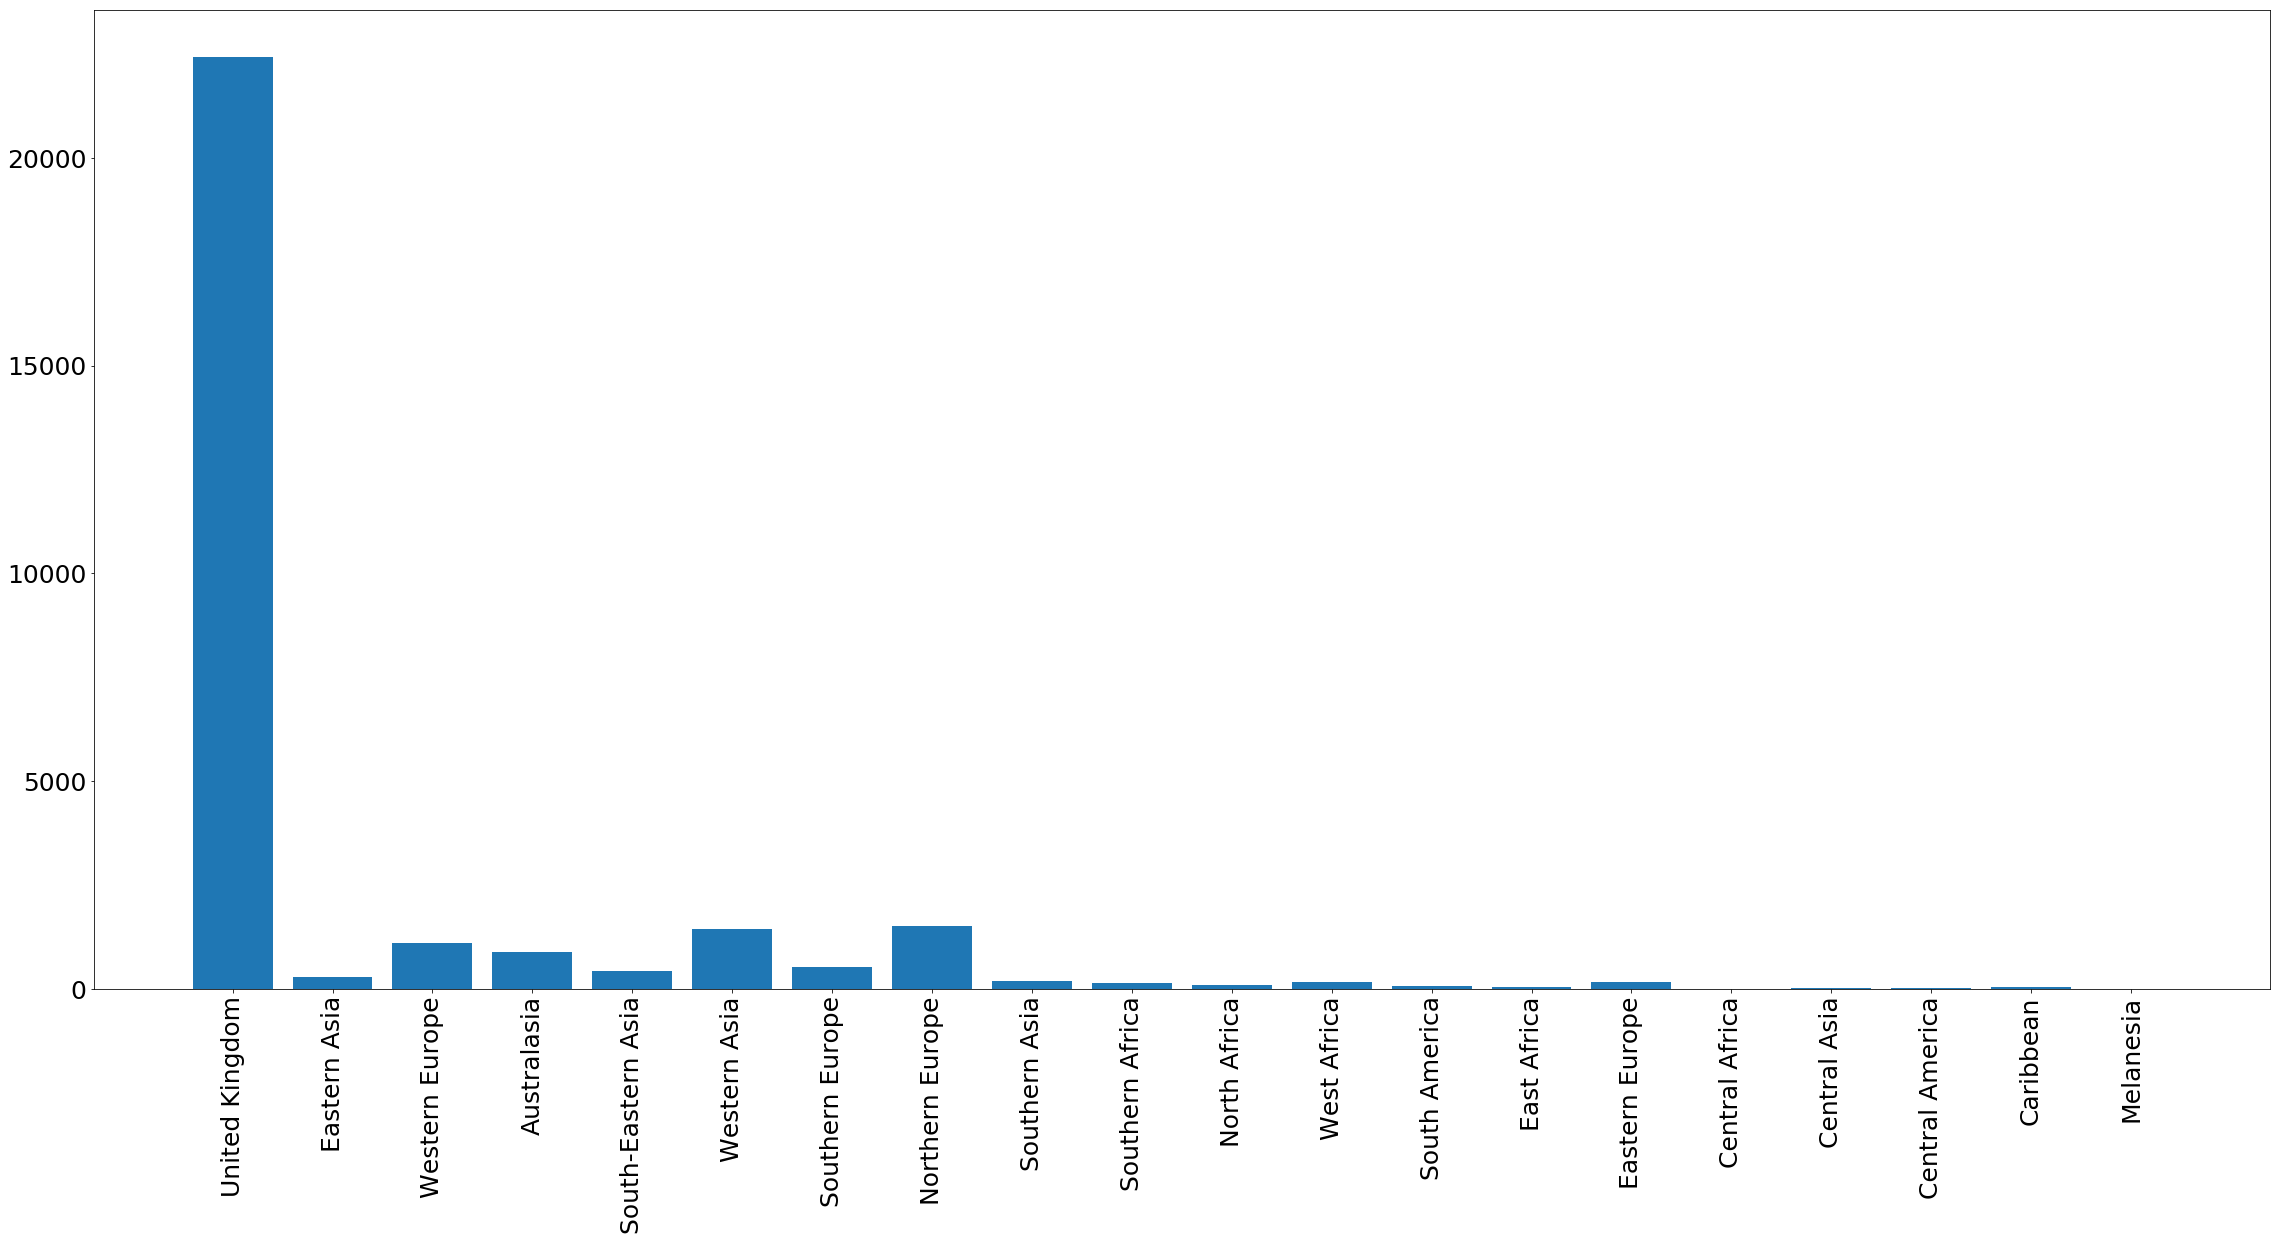

In [23]:
customer_region_names = list(customer_region_dict.keys())
customer_region_counts = list(customer_region_dict.values())

fig, axs = plt.subplots(1, 1, figsize=(39, 18), sharey=True)
plt.xticks(size=25,rotation=90)
plt.yticks(size=25)
axs.bar(customer_region_names, customer_region_counts)

The histogram above shows us that the customer base of the hotel is overwhelmingly domestic, with the remainder substantially hailing from Asia and Europe.

# 4.0 Modelling

In [24]:
df_Hilton_negReviews_clean = remove_values_from_col(df_Hilton, 'Negative_Review_stripped', neg_values_to_remove)
df_Hilton_negReviews_clean

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped,Reviewer_Region
24583,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Staff who couldn t speak English Public toile...,50,2367,Bar staff were great So we re overnight conci...,16,3,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",1 days,51.492514,-0.178792,Staff who couldn t speak English Public toilet...,Bar staff were great So we re overnight concie...,United Kingdom
24584,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,All facilities are badly maintained Air condi...,92,2367,No Positive,0,3,3.3,"[' Leisure trip ', ' Family with young childre...",1 days,51.492514,-0.178792,All facilities are badly maintained Air condit...,No Positive,Eastern Asia
24585,100 Queen s Gate Kensington and Chelsea London...,541,7/31/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,the attitude of couple of staff work in the r...,24,2367,location and environment some staff is very h...,10,9,7.5,"[' Leisure trip ', ' Family with young childre...",3 days,51.492514,-0.178792,the attitude of couple of staff work in the re...,location and environment some staff is very he...,United Kingdom
24586,100 Queen s Gate Kensington and Chelsea London...,541,7/30/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Breakfast staff chaotic but friendly Just nee...,12,2367,Fab location in Kensington and delicious bisc...,31,17,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",4 days,51.492514,-0.178792,Breakfast staff chaotic but friendly Just need...,Fab location in Kensington and delicious biscu...,United Kingdom
24587,100 Queen s Gate Kensington and Chelsea London...,541,7/25/2017,8.0,Doubletree by Hilton London Kensington,France,Ever changing mostly inexperienced reception ...,22,2367,Great location no surprises in the rooms unle...,24,31,7.1,"[' Business trip ', ' Solo traveler ', ' Queen...",9 days,51.492514,-0.178792,Ever changing mostly inexperienced reception s...,Great location no surprises in the rooms unles...,Western Europe
24588,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,I was not informed at the time of booking and...,101,2367,The location was excellent for visiting Londo...,36,7,4.6,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",14 days,51.492514,-0.178792,I was not informed at the time of booking and ...,The location was excellent for visiting London...,United Kingdom
24589,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,Hong Kong,They did clean the room on daily basis and al...,65,2367,The location is good One staff is good but fo...,14,3,5.0,"[' Leisure trip ', ' Family with young childre...",14 days,51.492514,-0.178792,They did clean the room on daily basis and als...,The location is good One staff is good but for...,Eastern Asia
24590,100 Queen s Gate Kensington and Chelsea London...,541,7/18/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The air conditioning in our room did not work...,34,2367,No Positive,0,3,6.3,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",16 days,51.492514,-0.178792,The air conditioning in our room did not work ...,No Positive,United Kingdom
24592,100 Queen s Gate Kensington and Chelsea London...,541,7/16/2017,8.0,Doubletree by Hilton London Kensington,Australia,Air conditioning was a complete failure We ha...,169,2367,Location was very good near museums tube and ...,60,29,6.5,"[' Leisure trip ', ' Couple ', ' King Deluxe F...",1

### 4.1 United Kingdom

In [25]:
def subset_df_by_reviewer_region(dataframe, region):
    """
    'subsets dataframe at given Reviewer Region'
    
    Args:
        dataframe: dataframe to be operated on
        region: region to subset by

    Returns:
        subset of dataframe where the Reviewer_Region column == region arg

    """
    
    
    dataframe_subsetted = dataframe[dataframe['Reviewer_Region']==region]
    return dataframe_subsetted

uk_reviewers_df = subset_df_by_reviewer_region(df_Hilton_negReviews_clean, 'United Kingdom')
uk_reviewers_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped,Reviewer_Region
24583,100 Queen s Gate Kensington and Chelsea London...,541,8/2/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Staff who couldn t speak English Public toile...,50,2367,Bar staff were great So we re overnight conci...,16,3,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",1 days,51.492514,-0.178792,Staff who couldn t speak English Public toilet...,Bar staff were great So we re overnight concie...,United Kingdom
24585,100 Queen s Gate Kensington and Chelsea London...,541,7/31/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,the attitude of couple of staff work in the r...,24,2367,location and environment some staff is very h...,10,9,7.5,"[' Leisure trip ', ' Family with young childre...",3 days,51.492514,-0.178792,the attitude of couple of staff work in the re...,location and environment some staff is very he...,United Kingdom
24586,100 Queen s Gate Kensington and Chelsea London...,541,7/30/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Breakfast staff chaotic but friendly Just nee...,12,2367,Fab location in Kensington and delicious bisc...,31,17,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",4 days,51.492514,-0.178792,Breakfast staff chaotic but friendly Just need...,Fab location in Kensington and delicious biscu...,United Kingdom
24588,100 Queen s Gate Kensington and Chelsea London...,541,7/20/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,I was not informed at the time of booking and...,101,2367,The location was excellent for visiting Londo...,36,7,4.6,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",14 days,51.492514,-0.178792,I was not informed at the time of booking and ...,The location was excellent for visiting London...,United Kingdom
24590,100 Queen s Gate Kensington and Chelsea London...,541,7/18/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The air conditioning in our room did not work...,34,2367,No Positive,0,3,6.3,"[' Leisure trip ', ' Group ', ' Twin Guest Roo...",16 days,51.492514,-0.178792,The air conditioning in our room did not work ...,No Positive,United Kingdom
24595,100 Queen s Gate Kensington and Chelsea London...,541,7/10/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Cost of off site parking The fact the outside...,59,2367,The location and the fact we were on sixth fl...,15,4,7.5,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",24 days,51.492514,-0.178792,Cost of off site parking The fact the outside ...,The location and the fact we were on sixth flo...,United Kingdom
24598,100 Queen s Gate Kensington and Chelsea London...,541,6/29/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,Our room wasn t done when we returned back ab...,94,2367,The Reception staff breakfast and staff at br...,10,4,6.3,"[' Leisure trip ', ' Family with young childre...",35 days,51.492514,-0.178792,Our room wasn t done when we returned back abo...,The Reception staff breakfast and staff at bre...,United Kingdom
24599,100 Queen s Gate Kensington and Chelsea London...,541,6/28/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,pillows too soft air conditioning totally ine...,17,2367,great choice of breakfast shower very efficie...,10,2,8.3,"[' Leisure trip ', ' Group ', ' Queen Guest Ro...",36 days,51.492514,-0.178792,pillows too soft air conditioning totally inef...,great choice of breakfast shower very efficien...,United Kingdom
24600,100 Queen s Gate Kensington and Chelsea London...,541,6/27/2017,8.0,Doubletree by Hilton London Kensington,United Kingdom,The breakfast was chaotic Very busy fine but ...,71,2367,Perfect 

In [26]:
def generate_binary_list(length,binary_num):
    """
    'generates list of 1s or 0s at given length'
    
    Args:
        length: length of list
        binary_num: 1 or 0 value to populate list

    Returns:
        list of 1s or 0s at given length

    """
    
    
    master_list = []
    
    i=0
    while i<length:
        master_list.append(binary_num)
        i+=1
    
    return master_list
    

def create_index_given_length(length):
    """
    creates list of given length incrementing from 1 - to be used as index for dataframe
    
    Args:
        length: length of list
        
    Returns:
        list of numbers incrementing from 1 at given length

    """
    
    index = []
    
    i=1
    while i <= length:
        index.append(i)
        i+=1
        
    return index


def extract_reviews(dataframe):
    """
    'extracts 'negative_review_stripped' and 'positive review stripped' columns from dataframe to be recast in new
    dataframe formatted for linear regression modelling'
    
    Args:
        length: length of list
        
    Returns:
        list of numbers incrementing from 1 at given length

    """
    
    columns = ['col']
    
    negative_reviews = list(dataframe["Negative_Review_stripped"].values)
    negative_reviews_length = len(negative_reviews)

    positive_reviews = list(dataframe["Positive_Review_stripped"].values)
    positive_reviews_length = len(positive_reviews)
    
    list_of_0s = generate_binary_list(negative_reviews_length,0)
    list_of_1s = generate_binary_list(positive_reviews_length,1)

    index = create_index_given_length(len(list_of_0s))
    review_inputData_df = pd.DataFrame(index=index, columns=columns)
    review_inputData_df['Reviews'] = negative_reviews
    review_inputData_df['Binary_values'] = list_of_0s
    
    
    review_inputData_df = review_inputData_df.drop(['col'],axis=1)
    review_inputData_df_1 = pd.DataFrame({"Reviews":positive_reviews, "Binary_values":list_of_1s})
    review_inputData_df_final = review_inputData_df.append(review_inputData_df_1)
    
    return review_inputData_df_final

In [27]:
uk_reviewers_df_final = extract_reviews(uk_reviewers_df)
uk_reviewers_df_final

,Reviews,Binary_values
1,Staff who couldn t speak English Public toilet...,0
2,the attitude of couple of staff work in the re...,0
3,Breakfast staff chaotic but friendly Just need...,0
4,I was not informed at the time of booking and ...,0
5,The air conditioning in our room did not work ...,0
6,Cost of off site parking The fact the outside ...,0
7,Our room wasn t done when we returned back abo...,0
8,pillows too soft air conditioning totally inef...,0
9,The breakfast was chaotic Very busy fine but t...,0
10,The first room we were given was awful The win...,0


In [28]:
def run_logistic_regression(dataframe):
    """
    'Performs Logistic Regression Modelling on dataframe of text data'
    
    Args:
        dataframe: dataframe for model to be run on 
        
    Returns:
        Logistic regression output, accuracy of model, list of 25 most positive and negative words in text

    """
    
    
    from sklearn.feature_extraction.text import CountVectorizer

    X_train, X_test, y_train, y_test = train_test_split(
         dataframe['Reviews'], dataframe['Binary_values'], test_size=0.33, random_state=42)

    cv = CountVectorizer(binary=True, stop_words='english')
    cv.fit(X_train)
    X_train_cv = cv.transform(X_train)
    X_test_cv = cv.transform(X_test)

    cv = CountVectorizer(binary=True, stop_words='english')
    cv.fit(X_train)
    X_train_cv = cv.transform(X_train)
    X_test_cv = cv.transform(X_test)

    c=0.01
    #look at different c values for best accuracy
    lr = LogisticRegression(C=c)
    print('---Regression Outcome---')
    print(lr.fit(X_train_cv, y_train))
    print('          ')
    print('---Accuracy Score (train set)---')
    print(lr.score(X_train_cv, y_train))
    print('           ')
    print('---Accuracy Score (test set)---')
    print(lr.score(X_test_cv, y_test))
    print('           ')
    print('---coefficient---')
    print(lr.coef_)
    print('           ')
    print('---25 most positive words---')
    feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), lr.coef_[0]
    )
}
    for best_positive in sorted(
        feature_to_coef.items(), 
        key=lambda x: x[1], 
        reverse=True)[:25]:
        print (best_positive)
        #print(lr.score(X_test_cv, y_test))
        
    print('      ')
    print('---25 most negative words---')
    for best_negative in sorted(
        feature_to_coef.items(), 
        key=lambda x: x[1])[:25]:
        print (best_negative)

In [29]:
run_logistic_regression(uk_reviewers_df_final)

---Regression Outcome---
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
          
---Accuracy Score (train set)---
0.8939606086063661
           
---Accuracy Score (test set)---
0.8954898616638242
           
---coefficient---
[[-0.08560649 -0.00333652 -0.00754584 ... -0.00359304 -0.00652896
   0.00475174]]
           
---25 most positive words---
('positive', 1.9840600982231524)
('location', 1.6747038954265059)
('comfortable', 0.9751771477617132)
('lovely', 0.9454837763003776)
('excellent', 0.9239495853291754)
('comfy', 0.8967752253707495)
('clean', 0.875836781796148)
('staff', 0.8745532442275963)
('friendly', 0.8159424555679665)
('nice', 0.8128658364090066)
('good', 0.7845159880495572)
('great', 0.7759043551428987)
('helpful', 0.7600476126472318)
('amazing', 0.5640323

### 4.2 Northern Europe

In [30]:
northern_europe_reviewers_df = subset_df_by_reviewer_region(df_Hilton_negReviews_clean, 'Northern Europe')
northern_europe_reviewers_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped,Reviewer_Region
24603,100 Queen s Gate Kensington and Chelsea London...,541,6/24/2017,8.0,Doubletree by Hilton London Kensington,Ireland,The air conditioning in the room was not work...,34,2367,The breakfast was lovely the staff was friendly,9,1,7.1,"[' Leisure trip ', ' Couple ', ' Queen Superio...",40 days,51.492514,-0.178792,The air conditioning in the room was not worki...,The breakfast was lovely the staff was friendly,Northern Europe
24617,100 Queen s Gate Kensington and Chelsea London...,541,5/15/2017,8.0,Doubletree by Hilton London Kensington,Ireland,Concierge didn t know his stuff I got two set...,30,2367,Location excellent Beds really comfy,7,5,8.8,"[' Leisure trip ', ' Family with young childre...",80 days,51.492514,-0.178792,Concierge didn t know his stuff I got two sets...,Location excellent Beds really comfy,Northern Europe
24670,100 Queen s Gate Kensington and Chelsea London...,541,12/19/2016,8.0,Doubletree by Hilton London Kensington,Ireland,Although just a niggle the tea at breakfast w...,14,2367,From beginning to end our stay was excellent ...,52,1,10.0,"[' Leisure trip ', ' Couple ', ' Twin Guest Ro...",227 day,51.492514,-0.178792,Although just a niggle the tea at breakfast wa...,From beginning to end our stay was excellent T...,Northern Europe
24705,100 Queen s Gate Kensington and Chelsea London...,541,9/7/2016,8.0,Doubletree by Hilton London Kensington,Denmark,It is annoying to queue for breakfast in the ...,256,2367,The location on Queen s Gate is unsurpassed T...,85,9,6.7,"[' Business trip ', ' Solo traveler ', ' Queen...",330 day,51.492514,-0.178792,It is annoying to queue for breakfast in the m...,The location on Queen s Gate is unsurpassed Tr...,Northern Europe
24734,100 Queen s Gate Kensington and Chelsea London...,541,7/21/2016,8.0,Doubletree by Hilton London Kensington,Ireland,The 2 hour delay in checking in The large cra...,49,2367,The location,3,1,4.6,"[' Leisure trip ', ' Family with older childre...",378 day,51.492514,-0.178792,The 2 hour delay in checking in The large crac...,The location,Northern Europe
24745,100 Queen s Gate Kensington and Chelsea London...,541,7/10/2016,8.0,Doubletree by Hilton London Kensington,Ireland,They delivered our room service to the wrong ...,34,2367,Room was very comfortable and not as small as...,35,1,8.8,"[' Leisure trip ', ' Family with older childre...",389 day,51.492514,-0.178792,They delivered our room service to the wrong r...,Room was very comfortable and not as small as ...,Northern Europe
24769,100 Queen s Gate Kensington and Chelsea London...,541,6/5/2016,8.0,Doubletree by Hilton London Kensington,Guernsey,The very noisy air conditioning unit It was s...,33,2367,The location,3,1,7.1,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",424 day,51.492514,-0.178792,The very noisy air conditioning unit It was st...,The location,Northern Europe
24791,100 Queen s Gate Kensington and Chelsea London...,541,4/26/2016,8.0,Doubletree by Hilton London Kensington,Isle of Man,Worst shower pressure I have ever experienced...,31,2367,Excellent location a short walk from Gloucest...,17,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",464 day,51.492514,-0.178792,Worst shower pressure I have ever experienced ...,Excellent location a short walk from Glouceste...,Northern Europe
24793,100 Queen s Gate Kensington and Chelsea London...,541,4/26/2016,8.0,Doubletree by Hilton London Kensington,Ireland,A minor thing but we used up the shower gel o...,26,2367,Staff polite friendly and attentive room perh...,26,4,9.2,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",464 day,51.492514,-0.178792,A minor thing but w

In [31]:
northern_europe_reviewers_df = extract_reviews(northern_europe_reviewers_df)
northern_europe_reviewers_df

,Reviews,Binary_values
1,The air conditioning in the room was not worki...,0
2,Concierge didn t know his stuff I got two sets...,0
3,Although just a niggle the tea at breakfast wa...,0
4,It is annoying to queue for breakfast in the m...,0
5,The 2 hour delay in checking in The large crac...,0
6,They delivered our room service to the wrong r...,0
7,The very noisy air conditioning unit It was st...,0
8,Worst shower pressure I have ever experienced ...,0
9,A minor thing but we used up the shower gel on...,0
10,My wife elected to pay for the stay via cash T...,0


In [32]:
run_logistic_regression(northern_europe_reviewers_df)

---Regression Outcome---
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
          
---Accuracy Score (train set)---
0.8699460916442049
           
---Accuracy Score (test set)---
0.8538251366120219
           
---coefficient---
[[-0.02822601 -0.00369334 -0.00399364 ...  0.00377481 -0.00930435
  -0.00368685]]
           
---25 most positive words---
('location', 0.6433455329011661)
('positive', 0.4234136327411062)
('staff', 0.3286148832237274)
('good', 0.27898751929348325)
('friendly', 0.26568618622072754)
('comfortable', 0.2463299046691829)
('great', 0.24458954474910044)
('nice', 0.23783926816785608)
('excellent', 0.21680905185898325)
('helpful', 0.21323287664991133)
('clean', 0.17664582351896105)
('lovely', 0.16988503212745198)
('comfy', 0.11837773483640868)
('station',

### 4.3 Western Asia

In [33]:
western_asia_reviewers_df = subset_df_by_reviewer_region(df_Hilton_negReviews_clean, 'Western Asia')
western_asia_reviewers_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Negative_Review_stripped,Positive_Review_stripped,Reviewer_Region
24596,100 Queen s Gate Kensington and Chelsea London...,541,7/3/2017,8.0,Doubletree by Hilton London Kensington,United Arab Emirates,My husband and I were very disappointed with ...,361,2367,The breakfast was fairly good,7,2,4.6,"[' Couple ', ' Queen Guest Room ', ' Stayed 2 ...",31 days,51.492514,-0.178792,My husband and I were very disappointed with o...,The breakfast was fairly good,Western Asia
24634,100 Queen s Gate Kensington and Chelsea London...,541,4/7/2017,8.0,Doubletree by Hilton London Kensington,United Arab Emirates,When carrying luggage do not go to Gloucester...,48,2367,The hotel is easy to get to It is very clean ...,38,47,9.2,"[' Leisure trip ', ' Solo traveler ', ' Queen ...",118 day,51.492514,-0.178792,When carrying luggage do not go to Gloucester ...,The hotel is easy to get to It is very clean a...,Western Asia
24642,100 Queen s Gate Kensington and Chelsea London...,541,3/13/2017,8.0,Doubletree by Hilton London Kensington,Lebanon,The rooms are too small,7,2367,The location is excellent yet a calm neighbor...,48,9,7.1,"[' Leisure trip ', ' Family with young childre...",143 day,51.492514,-0.178792,The rooms are too small,The location is excellent yet a calm neighborh...,Western Asia
24652,100 Queen s Gate Kensington and Chelsea London...,541,2/23/2017,8.0,Doubletree by Hilton London Kensington,United Arab Emirates,Nothing to fault,5,2367,The staff were excellent small but extremely ...,31,11,10.0,"[' Leisure trip ', ' Solo traveler ', ' Queen ...",161 day,51.492514,-0.178792,Nothing to fault,The staff were excellent small but extremely c...,Western Asia
24664,100 Queen s Gate Kensington and Chelsea London...,541,1/4/2017,8.0,Doubletree by Hilton London Kensington,Cyprus,Theft of GBP20 cash which was accidentally dr...,28,2367,Room size was good kettle with coffee selecti...,29,19,8.3,"[' Leisure trip ', ' Family with young childre...",211 day,51.492514,-0.178792,Theft of GBP20 cash which was accidentally dro...,Room size was good kettle with coffee selectio...,Western Asia
24707,100 Queen s Gate Kensington and Chelsea London...,541,8/28/2016,8.0,Doubletree by Hilton London Kensington,Turkey,It would be great if there is a mini refriger...,45,2367,Breakfast and registration staff are wonderfu...,19,1,9.2,"[' Couple ', ' Twin Guest Room ', ' Stayed 5 n...",340 day,51.492514,-0.178792,It would be great if there is a mini refrigera...,Breakfast and registration staff are wonderful...,Western Asia
24712,100 Queen s Gate Kensington and Chelsea London...,541,8/22/2016,8.0,Doubletree by Hilton London Kensington,United Arab Emirates,Cleaning of the rooms is soo bad never seen t...,65,2367,Only the convenient location close to the sta...,9,1,3.3,"[' Leisure trip ', ' Solo traveler ', ' Queen ...",346 day,51.492514,-0.178792,Cleaning of the rooms is soo bad never seen th...,Only the convenient location close to the station,Western Asia
24717,100 Queen s Gate Kensington and Chelsea London...,541,8/16/2016,8.0,Doubletree by Hilton London Kensington,Saudi Arabia,To be honest nothing,6,2367,I was wondering why this hotel rate is 7 9 It...,45,7,10.0,"[' Leisure trip ', ' Family with older childre...",352 day,51.492514,-0.178792,To be honest nothing,I was wondering why this hotel rate is 7 9 It ...,Western Asia
24786,100 Queen s Gate Kensington and Chelsea London...,541,5/4/2016,8.0,Doubletree by Hilton London Kensington,United Arab Emirates,Even though we had an issue where our room wa...,38,2367,As usual the room was excellent and clean The...,29,17,8.3,"[' Leisure trip ', ' Family with older childre...",456 day,51.492514,-0.178792,Even though we ha

In [34]:
western_asia_reviewers_df_final = extract_reviews(western_asia_reviewers_df)
western_asia_reviewers_df_final

,Reviews,Binary_values
1,My husband and I were very disappointed with o...,0
2,When carrying luggage do not go to Gloucester ...,0
3,The rooms are too small,0
4,Nothing to fault,0
5,Theft of GBP20 cash which was accidentally dro...,0
6,It would be great if there is a mini refrigera...,0
7,Cleaning of the rooms is soo bad never seen th...,0
8,To be honest nothing,0
9,Even though we had an issue where our room was...,0
10,rooms are too small I picked two single bed ro...,0


In [35]:
run_logistic_regression(western_asia_reviewers_df_final)

---Regression Outcome---
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
          
---Accuracy Score (train set)---
0.8717277486910995
           
---Accuracy Score (test set)---
0.8673740053050398
           
---coefficient---
[[-0.02133909  0.00090887 -0.00355568 ...  0.00943285  0.00698625
  -0.00137718]]
           
---25 most positive words---
('location', 0.8622667626321892)
('positive', 0.42025116095218995)
('staff', 0.23384447870729955)
('nice', 0.21814024859920286)
('great', 0.1965485514303129)
('good', 0.18539922176070478)
('helpful', 0.15457678829041152)
('friendly', 0.15391071645053772)
('clean', 0.14050036943443234)
('excellent', 0.12417555785135777)
('close', 0.110638110579254)
('station', 0.10315235104458503)
('breakfast', 0.0991082681158315)
('comfortable

# 5.0 Interpreting

## 5.1 Most Positive Review Words

The most positive words by UK reviewers were:

1. Location
2. Comfortable
3. Clean

Filler words such as "good, positive, amazing, great, etc." were removed. 

#### Location

In [36]:
uk_location_reviews_df = uk_reviewers_df_final[uk_reviewers_df_final['Reviews'].str.contains("location")]

In [37]:
def df_column_to_list(dataframe):
    """
    'outputs 'Review' column of dataframe as a list'
    
    Args:
        dataframe: dataframe to have col converted to list
        
    Returns:
        list of values at given column of dataframe

    """
    
    text_list = dataframe['Reviews'].values
    
    return text_list


uk_location_reviews_list = df_column_to_list(uk_location_reviews_df)
uk_location_reviews_text = " ".join(uk_location_reviews_list)

In [38]:
def search(text, target):
    n = 8
    
    """
    'finds the 8 words preceding and following target arg'
    
    Args:
        text: text to parse
        target: target word to find surrounding words of
        
    Returns:
        string of 8 words preceding and following target arg

    """
    
    word = r"\W*([\w]+)"
    search = re.search(r'{}\W*{}{}'.format(word*n,target,word*n), text)
    
    if search is not None:
        groups = search.groups()
        surrounding_searchWords =  groups[:n],groups[n:]
    
        surroundingWords_list = []
    
        i=0
        while i < len(surrounding_searchWords[0]):
            surroundingWords_list.append(surrounding_searchWords[0][i])
            i+=1
        
        j=0
        while j < len(surrounding_searchWords[1]):
            surroundingWords_list.append(surrounding_searchWords[1][j])
            j+=1
        
        return " ".join(surroundingWords_list)
    
    else:
        return 'None'
    


def search_str_in_list(input_list, target):
    surrounding_word_list = []
    
    iterable = 1
    
    for i in input_list:
        surrounding_word = search(i, target)
        surrounding_word_list.append(surrounding_word)
        #print('appended' + ' ' + str(iterable))
        iterable +=1
        
    return surrounding_word_list
    #for s in surrounding_word_list:
        #print('---review {iterable}---')
        #print(s)
        #iterable += 1

In [62]:
words_surrounding_location = search_str_in_list(uk_location_reviews_list, 'location')

In [63]:
words_surrounding_location

['isolated corridor Wi fi poor and intermittent Good and proximity to tube station This kind of',
 'None',
 'The room was nice but t h e a bit noisy Room 143 Good location excellent',
 'away from lifts We got everything except the away from the lifts We were opposite the',
 'We originally booked the hotel because of the and being very close to South Kensington station',
 'None',
 'None',
 'and quite small but for the price and both were bea r a b l e',
 'On querying we were told it was al on arrival and that all that was left',
 'ultra modern yet small Hub in a fantastic It was brilliant we managed to get some',
 'room service before 6 00 am consodering the this is a transit hotel where the guest',
 'train noise but this in inevitable given its Fiddly TV menu Excessive internet charge access should',
 'booking with booking com led to the al of our rooms being very far from each',
 'too expensive to use more often given superb Do you have government r a t e',
 'None',
 'sho w e r h e a 

In [64]:
words_surrounding_location_str = """tube-station South-Kensington-station parking leisure \
                                  main-attractions Greenland-Docks exhibition-centre views views tube station \
                                  young-professionals local-shops Royal-Albert-Hall Royal-Albert-Hall \
                                  little-eateries Kensington-palace museums Royal-Albert-hall museums \
                                  transport Royal-Albert-Hall tube-station museums Royal-Albert-Hall\
                                  tube shopping site-seeing convenient winter wonderland Paddington-Station \
                                  airport getting-around paddington-station catch-an-early-train \
                                  Convenience Paddington-station convenient convenient Paddington-station \
                                  right-outside-the-station tube attractions heathrow-express tube train \
                                  Heathrow Express Heathrow Express convenient convenient Convenience central \
                                  Queensway-tube Kensington-gardens easy access-into-the-city tube-Queensgate \
                                  concerts Hyde-Park Hyde-park Hyde-Park central central central central Hyde-Park \
                                  Hope-On-Hop-Off-Buses transport Museum Library Euston-Station Euston-Camden \
                                  bus-links Olympic-park Euston Euston Shakespeare-globe-theatre tube station \
                                  tube-station Ealing-Common Ealing-Common Piccadilly-line easy-access-to-London \
                                  good-for-visiting-London tube-station convenient Victoria-Station \
                                  transport-easy-to-find Victoria-station convenience London-Victoria \
                                  excellent-for-seeing-london Victoria-Apollo convenient convenient \
                                  Victoria-Station Victoria-Station Victoria-station train-station exploring London\
                                  central theatre good-for-exploring-London sight-seeing tube central \
                                  victoria-station easy-to-reach-knightsbridge Victoria-station Victoria-Station \
                                  Victoria-station central Victoria-station Victoria-station central central \
                                  convenient great-location-for-central-London cannot-get-more-central \
                                  London-sights central Great-for-central-London Paddington-Stn Hyde-park \
                                  Oxford-street excellent-location-to-explore-London Edgeware-Tube Edgeware-Tube \
                                  Edgeware-tube shisha-lounges excellent-to-get-around-London central convinent \
                                  ease-of-travel Paddington-station tube ease-of-access tube rail-links shopping \
                                  site-seeing tube bus concert Wembley
                                  """

In [65]:
words_surrounding_location_str

'tube-station South-Kensington-station parking leisure                                   main-attractions Greenland-Docks exhibition-centre views views tube station                                   young-professionals local-shops Royal-Albert-Hall Royal-Albert-Hall                                   little-eateries Kensington-palace museums Royal-Albert-hall museums                                   transport Royal-Albert-Hall tube-station museums Royal-Albert-Hall                                  tube shopping site-seeing convenient winter wonderland Paddington-Station                                   airport getting-around paddington-station catch-an-early-train                                   Convenience Paddington-station convenient convenient Paddington-station                                   right-outside-the-station tube attractions heathrow-express tube train                                   Heathrow Express Heathrow Express convenient convenient Convenience central      

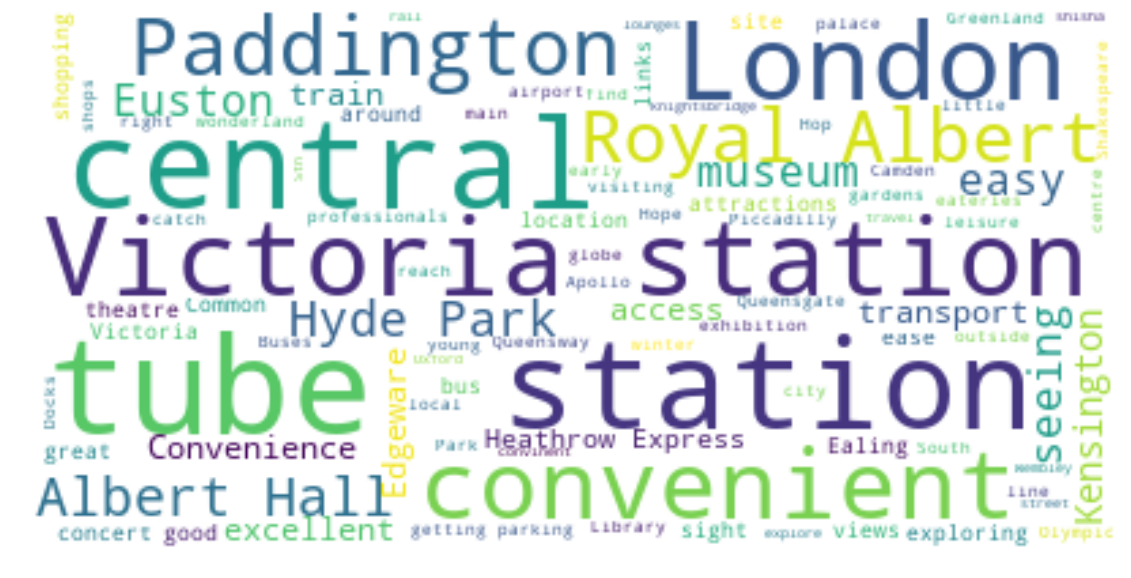

In [66]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_surrounding_location_str)
plt.figure(figsize = [20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Comfortable

In [67]:
uk_comfortable_reviews_df = uk_reviewers_df_final[uk_reviewers_df_final['Reviews'].str.contains("comfortable")]
uk_comfortable_reviews_list = df_column_to_list(uk_comfortable_reviews_df)

In [68]:
words_surrounding_comfortable = search_str_in_list(uk_comfortable_reviews_list, 'comfortable')

In [43]:
words_surrounding_comfortable

['None',
 'over at us which made us feel un and rushed The rooms are very small and',
 'The bed was real l y u n particularly the pillows which were like lying on',
 'basically dribbled on you The bed was un And it was my partners 21st and I',
 'of the night which meant a very un nights sleep The staff were apologetic and did',
 'The bed was not the mo s t that I ve sle p t i n',
 'None',
 'sorry to say the bed was really un we both just fell in a hole each',
 'The pillows weren t good Not overl y Breakfast was expensive but a little less we',
 'The bed was broken and so u n the room was way too small There was',
 'The pillows are not v e r y And there was only 1 small bottle of',
 'more friendly The beds were the most un I have ever encountered with my mattress sloping',
 'None',
 'staff Cockroach like creature in bathroom Really un bed and dark tiny room Also air con',
 'None',
 'The bed wa s s o u n everything else wa s g o o d',
 'None',
 'None',
 'None',
 'None',
 'None',
 'matt r

In [44]:
words_surrounding_comfortable_str = """ room beds hotel room room bed bedding room bed room chair bed \
                                    room bed room bed room bed room bed bed bed bed bed bed bed room bed bed area \
                                    bed room room bed bed bed room room room room room room bed bed bed bed \
                                    bed room bed bed room bed bed room bed room bed bed bed bed room

                                    """

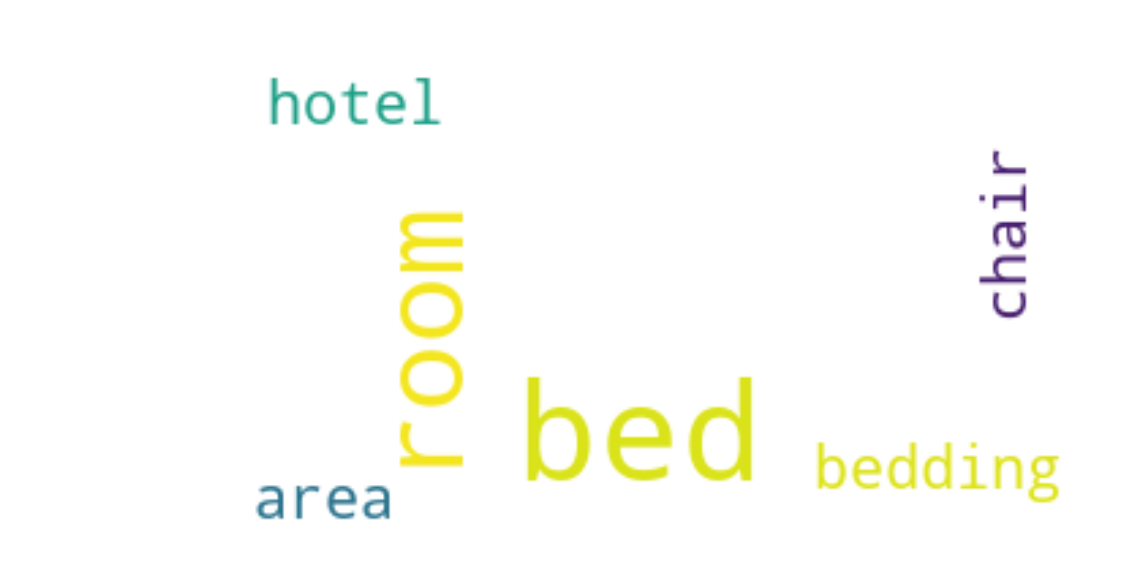

In [69]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_surrounding_comfortable_str)
plt.figure(figsize = [20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Clean

In [46]:
uk_clean_reviews_df = uk_reviewers_df_final[uk_reviewers_df_final['Reviews'].str.contains("clean")]
uk_clean_reviews_list = df_column_to_list(uk_clean_reviews_df)

In [47]:
words_surrounding_clean = search_str_in_list(uk_clean_reviews_list, 'clean')

In [48]:
words_surrounding_clean

['few minutes later the room maid came to the room and my son was in the',
 'stayed two nights and the room was not ed or made up during our stay The',
 'and then again at 7 25 Then the er knocked on my door at 8 15',
 'upstairs walking around Was woken up early by ers making a noise outside in corridor taking',
 'the wall off the room wasn t as as it could have been Breakfast was a',
 'too close to hot pipe not nice to teeth in warm water or grab glass to',
 'I appreciate that rooms need to b e ed and was woken up by the vacuuming',
 'for the price the bathroom was tiny but and with a good sho w e r',
 'not disturb sign on the door and the er still c a m e i n',
 'coffee available sat night as machine was being ed Bar staff were misera b l e',
 'Very noisy housekeepers woken very early by them ing near our room tried to come into',
 'Staff not very efficient corridors not kept as as should be though rooms were clea n',
 'Travel lodge and premier inn are a lot er than this hotel Won t 

In [49]:
words_surrounding_clean_str = """hotel room room room floor room room tidy bathroom room room room room room room \
                                 very exceptionally very nicely-presented tidy tidy tidy room very accomodation \
                                 room bathroom room extremely very room very room very very 
                              """

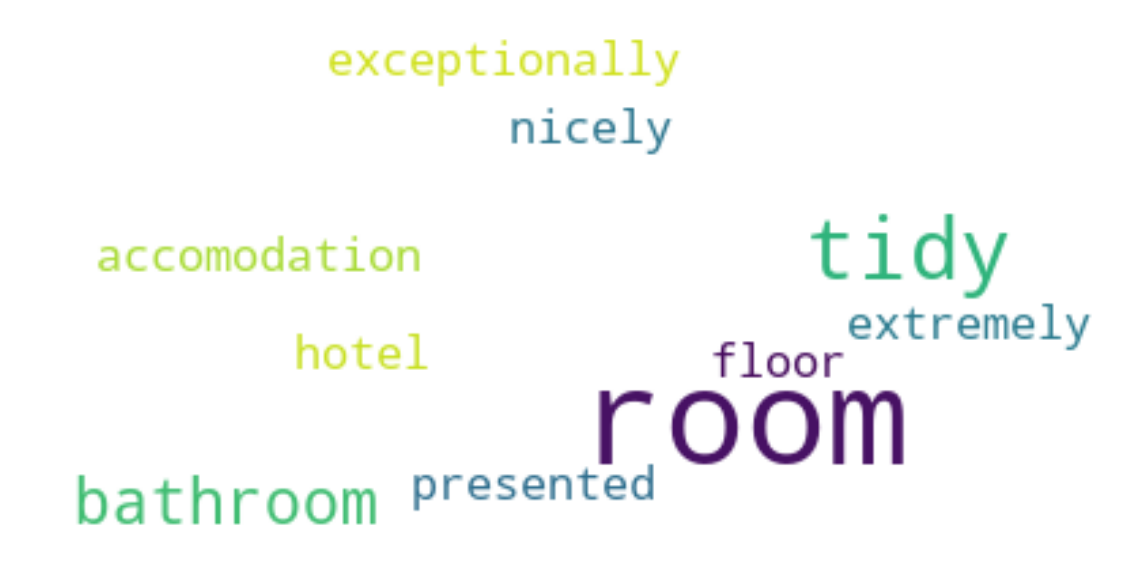

In [50]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_surrounding_clean_str)
plt.figure(figsize = [20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5.2 Most Negative Review Words

The most positive words by UK reviewers were:

1. Room 
2. Bathroom
3. Time

Filler words such as "good, positive, amazing, great, etc." were removed. 

#### Room

In [70]:
words_surrounding_room = search_str_in_list(uk_location_reviews_list, 'room')

In [53]:
words_surrounding_room

['None',
 'None',
 'None',
 'Only criticism was that we requeste d a on a high floor overlooking the front and',
 'being very close to South Kensington station The s are old and outdated and the hotel',
 'None',
 'Th e d o u b l e was very small and claustrophobic definitely not worth',
 'None',
 'Although we booked 2 queen delu x e s with queen beds we were given 2',
 'late so perhaps there would have been better s if we booked earlier We went on',
 'No breakfast before 6 00 am not even service before 6 00 am consodering the location',
 'None',
 'booking com led to the allocation of our s being very far from each other on',
 'None',
 'None',
 'None',
 'None',
 'None',
 'not answer to my phone call from the I spent 15 20 minutes near the phone',
 'this is understandable due to the location The was small and could have done with a',
 'to get the refurbished done or herring in s before letting them to peop l e',
 'i can say apart from that lovely hotel and brilliant loc a t i o n',
 'Non

In [54]:
words_surrounding_room_str = """ misallocation outdated small claustrophobic misallocation misallocation small \
                                 expensive value misallocation view bottles dark small-bath lighting AC cold AC \
                                 small bathroom curtains heater small lighting dim heating small size small view \
                                 small dated small dark old small bath hair lighting serviced expensive small \
                                 basic allocated key wait staff small misallocation dated small wardrobes dark \
                                 appliances repair small expensive small basic cold damp dated expensive basic \
                                 value AC temperature small small traffic traffic traffic noise noise 
                              """

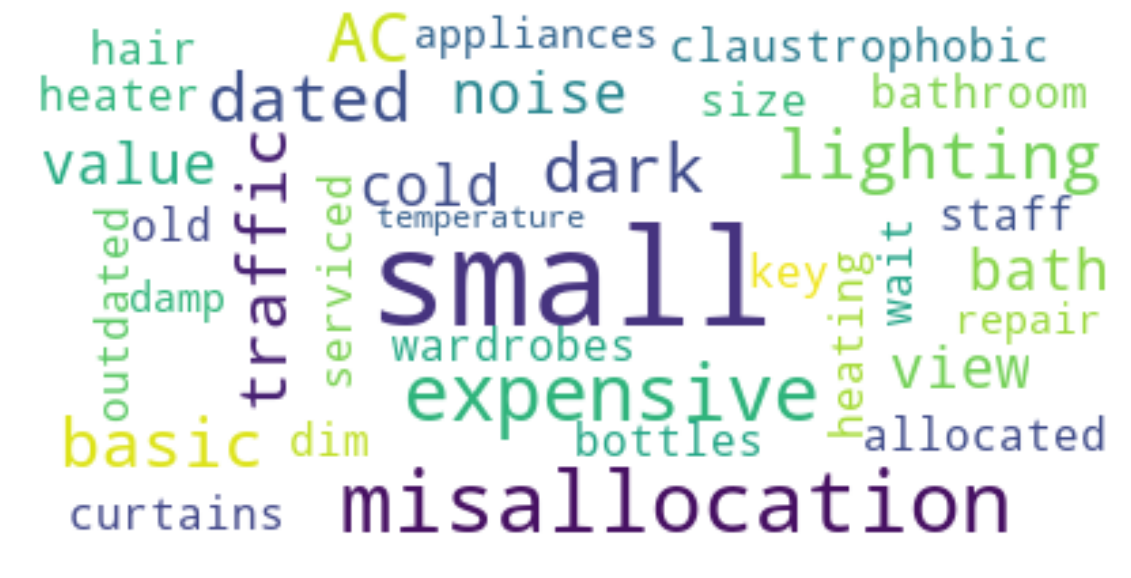

In [55]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")\
.generate(words_surrounding_room_str)
plt.figure(figsize = [20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Bathroom

In [56]:
words_surrounding_bathroom = search_str_in_list(uk_location_reviews_list, 'bathroom')
words_surrounding_bathroom

['None',
 'None',
 'None',
 'None',
 'a suitcase for example new showers in the but very little pressure I understand London is',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'that offer Sky at the very least The was lovely apart for the fact that the',
 'None',
 'None',
 'None',
 'some old grapes were lying on the floor walk in shower water was overflowing we chose',
 'None',
 'None',
 'None',
 'TV channels worked The extractor fan in the didn t work The seals on the windows',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'with a railing in front of it The was dingy and the shower head cocked to',
 'None',
 'Had a king room and t h e was extremely 

In [57]:
words_surrounding_bathroom_str = """overflowing dingy towel-rail disgusting hair dated hair 

                                 """

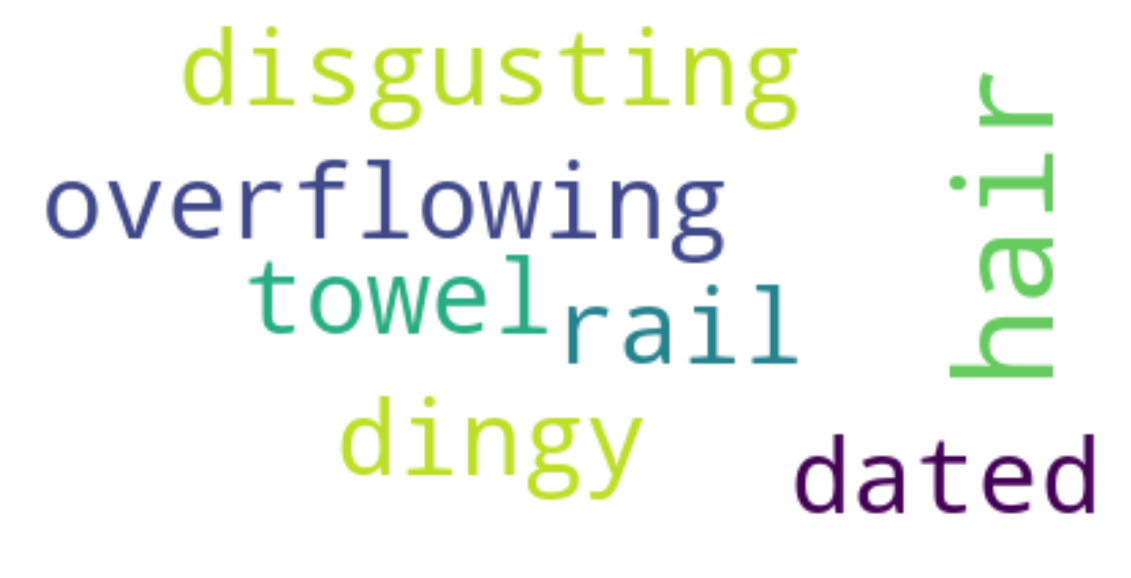

In [58]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")\
.generate(words_surrounding_bathroom_str)
plt.figure(figsize = [20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Expensive

In [59]:
words_surrounding_expensive = search_str_in_list(uk_location_reviews_list, 'expensive')
words_surrounding_expensive

['None',
 'None',
 'None',
 'None',
 'but very little pressure I understand London is and you don t get a lot for',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'The hotel i s v e r y for what it is I didn t think',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'the price of the room w a s but for the location and service we received',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'never honoured it and it was a bit for the loc a t i o n',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'plug by bed which always annoys me Very for what you get Paying for location I',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'No

In [60]:
words_surrounding_expensive_str = """understand what-it-is location
                                     food lounge outrageous small park room
                                     expensive 
                                  """

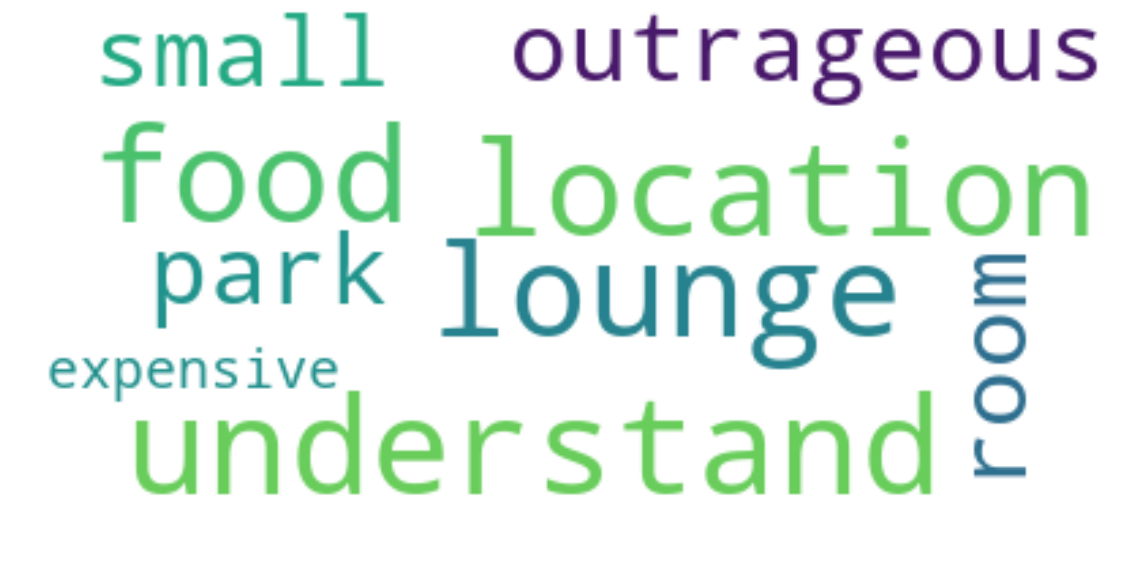

In [61]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")\
.generate(words_surrounding_expensive_str)
plt.figure(figsize = [20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 6.0 Topics for Further Exploration

Analyze the sentiments of customers from Hotel's customers hailing from regions outside UK.